In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:

X = np.array([[0.4, -0.7],[-1.5, -1.0],[-1.4, -0.9],[-1.3, -1.2],[-1.1, -0.2],
     [-1.2, -0.4],[-0.5, 1.2],[-1.5, 2.1],[1.0, 1.0],[1.3, 0.8],[1.2, 0.5],
     [0.2, -2.0],[0.5, -2.4],[0.2, -2.3],[0.0, -2.7],[1.3, 2.1]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

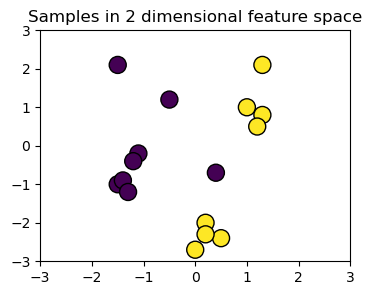

In [15]:
# Plotting the data
fig, axs = plt.subplots(figsize = (4,3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
axs.set(xlim = (x_min, x_max), ylim = (y_min, y_max))

scatter = axs.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
# axs.legend(scatter.legend_elements(), loc = "upper right", title= 'Classes')
axs.set_title("Samples in 2 dimensional feature space")
plt.show()

In [19]:

from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [24]:
def plot_training_data_with_decision_boundary(kernel):
    # Train the SVM
    clf = SVC(kernel = kernel, gamma = 2).fit(X,y)
    
    # setting for the plot
    _, ax = plt.subplots(figsize = (4,3))
    x_min, x_max, y_min, y_max = -3,3,-3,3
    ax.set(xlim = (x_min, x_max), ylim = (y_min, y_max))
    
    # plot decision boundary and margins
    common_params = {'estimator': clf, "X":X, 'ax': ax}
    DecisionBoundaryDisplay.from_estimator(**common_params,
                                          response_method = 'predict',
                                          plot_method = "pcolormesh",
                                          alpha = 0.3)
    
    DecisionBoundaryDisplay.from_estimator(**common_params,
                                          response_method = "decision_function",
                                          plot_method = 'contour',
                                          levels = [-1,0,1],
                                          colors = ['k','k','k'],
                                          linestyle = ['--','-','--'])
    
    # Plot bigger circle around the samples that serves as support vectors
    ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
              s = 250, facecolors = 'none', edgecolors = 'k')
    
    
    # plot samples by color and add legend
    ax.scatter(X[:,0],X[:,1], c = y, s = 150, edgecolors = 'k')
    ax.legend(*scatter.legend_elements(), loc = 'upper right', title = "Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel function in SVM")
    
    _ = plt.show()
    

/home/cdot/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'linestyle'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


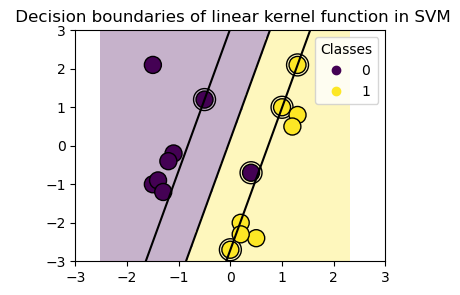

In [25]:
plot_training_data_with_decision_boundary('linear')